In [41]:
import sys
sys.path.append("/pithy/code")
from fipy import *
from pithy import *



In [42]:
nx = ny = 20

mesh = Grid2D(nx=nx, ny=ny, dx=0.25, dy=0.25)
phi = CellVariable(name=r"$\phi$", mesh=mesh)
psi = CellVariable(name=r"$\psi$", mesh=mesh)



In [44]:
noise = GaussianNoiseVariable(mesh=mesh,mean=0.5,variance=0.01).value

In [52]:
phi[:] = noise
print phi

[ 0.42186676  0.46648146  0.39975302  0.53078881  0.49478265  0.65765994
  0.3321846   0.50321228  0.72470003  0.4932835   0.39272857  0.48256746
  0.49581689  0.64938735  0.25057672  0.60893871  0.63895954  0.63859931
  0.48857754  0.44891623  0.67323815  0.47230733  0.48028602  0.3941383
  0.42613361  0.39743307  0.45652664  0.31514116  0.48147108  0.51502429
  0.48240952  0.5476529   0.46805024  0.58097383  0.48675808  0.51120067
  0.40879873  0.46680125  0.35330172  0.59053865  0.75339669  0.49403206
  0.67043688  0.44027074  0.43757348  0.52455322  0.68120605  0.45830585
  0.41546201  0.62051515  0.43570791  0.58860141  0.50592375  0.46313183
  0.37180219  0.50759091  0.54311358  0.5789106   0.67308053  0.37360083
  0.6305931   0.49132836  0.59302271  0.57447458  0.52788094  0.46329298
  0.65022465  0.59634638  0.49465999  0.59739979  0.52274048  0.45846321
  0.67043176  0.46787504  0.66532317  0.43467734  0.44391052  0.55453483
  0.31055538  0.47502984  0.72447285  0.53413404  0.

In [18]:
D = a = epsilon = 1.
dfdphi = a**2 * 2 * phi * (1 - phi) * (1 - 2 * phi)
dfdphi_ = a**2 * 2 * (1 - phi) * (1 - 2 * phi)
d2fdphi2 = a**2 * 2 * (1 - 6 * phi * (1 - phi))
eq1 = (TransientTerm(var=phi) == DiffusionTerm(coeff=D, var=psi))
eq2 = (ImplicitSourceTerm(coeff=1., var=psi) 
       == ImplicitSourceTerm(coeff=-d2fdphi2, var=phi) 
       - d2fdphi2 * phi + dfdphi - DiffusionTerm(coeff=epsilon**2, var=phi))
eq3 = (ImplicitSourceTerm(coeff=1., var=psi) 
        == ImplicitSourceTerm(coeff=dfdphi_, var=phi)
        - DiffusionTerm(coeff=epsilon**2, var=phi))
eq = eq1 & eq2
dexp = -5


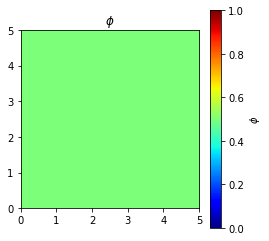

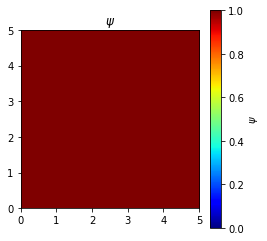

In [20]:
elapsed = 0.
duration = 100000
while elapsed < duration:
    dt = min(100, numerix.exp(dexp))
    eq.solve(dt=dt)
    elapsed += dt
    dexp += 0.1
viewer = Viewer(vars=(phi, psi)) # , datamin=0., datamax=1.)
